In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os
# 
path = '../Data/'

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
# !kaggle datasets list -s "Fake Job Description Prediction"
!kaggle datasets list -s "IBM HR Analytics Employee Attrition & Performance"

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
pavansubhasht/ibm-hr-analytics-attrition-dataset                  IBM HR Analytics Employee Attrition & Performance    50KB  2017-03-31 06:55:16         106569       1945  0.88235295       
uniabhi/ibm-hr-analytics-employee-attrition-performance           IBM HR Analytics Employee Attrition & Performance    50KB  2021-09-08 20:18:29            496         18  0.7058824        
ahmdel/ibm-hr-analytics-employee-attrition-performance            IBM HR Analytics Employee Attrition & Performance    50KB  2018-01-07 08:24:38            484         10  0.29411766       
rushikeshghate/capstone-projectibm-employee-attrit

In [4]:
!kaggle datasets download -d "pavansubhasht/ibm-hr-analytics-attrition-dataset"
!mv *.zip ../Data/
filename = !ls ../Data/*.zip

  0%|                                               | 0.00/50.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 2.31MB/s]


In [5]:
# Unzip
with zipfile.ZipFile(filename[0], mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(filename[0])

In [6]:
csv = !ls ../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv
csv = csv[0]
csv

'../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv'

- Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.


- Education
    - 1 'Below College'
    - 2 'College'
    - 3 'Bachelor'
    - 4 'Master'
    - 5 'Doctor'


- Environment Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Job Involvement
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Job Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Performance Rating
    - 1 'Low'
    - 2 'Good'
    - 3 'Excellent'
    - 4 'Outstanding'


- Relationship Satisfaction
    - 1 'Low'
    - 2 'Medium'
    - 3 'High'
    - 4 'Very High'


- Work Life Balance
    - 1 'Bad'
    - 2 'Good'
    - 3 'Better'
    - 4 'Best'

In [7]:
# Read CSV into a DataFrame
df = pd.read_csv(csv)

### Exploratory Data Analysis

In [8]:
# Display first 5 records
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.shape

(1470, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# Change categorical feature to categorical datatypes 
df = df.astype({"Attrition": 'category', "BusinessTravel": 'category', "Department": 'category', 
                "Education": 'category', "EducationField": 'category', "EnvironmentSatisfaction": 'category', 
                "Gender": 'category', "JobInvolvement": 'category', "JobLevel": 'category', 
                "JobLevel": 'category', "JobRole": 'category', "JobSatisfaction": 'category', 
                "MaritalStatus": 'category', "NumCompaniesWorked": 'category', "Over18": 'category', 
                "OverTime": 'category',"PerformanceRating": 'category',"RelationshipSatisfaction": 'category',
                "StockOptionLevel": 'category', "TrainingTimesLastYear": 'category',
                "WorkLifeBalance": 'category'})

In [12]:
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [13]:
# Display categorical columns
df[categorical_cols].head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,8,Y,Yes,3,1,0,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,1,Y,No,4,4,1,3,3
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,6,Y,Yes,3,2,0,3,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,1,Y,Yes,3,3,0,3,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,9,Y,No,3,4,1,3,3


In [14]:
# Display numerical columns
df[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,5993,19479,11,80,8,6,4,0,5
1,49,279,8,1,2,61,5130,24907,23,80,10,10,7,1,7
2,37,1373,2,1,4,92,2090,2396,15,80,7,0,0,0,0
3,33,1392,3,1,5,56,2909,23159,11,80,8,8,7,3,0
4,27,591,2,1,7,40,3468,16632,12,80,6,2,2,2,2


In [15]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
StandardHours,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0


In [16]:
df[categorical_cols].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


#### Note: 
All the columns below contain a single value that will be removed because it would NOT add any value and there is no missing values in this dataset.
- EmployeeCount
- StandardHours
- Over18
- EmployeeNumber: Employee ID number to be removed
<br>
**Note: All the columns below has a large gap between 75% and Max**
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [17]:
# Remove features 
rem = ['EmployeeCount', 'StandardHours','Over18','EmployeeNumber']
df.drop(rem, axis=1, inplace=True)

In [18]:
# Reinitialize
# listing of all the numeric columns
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
# listing of all the categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [19]:
df[categorical_cols].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,3,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


In [20]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0
YearsInCurrentRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.00,18.0


## Data Visualization:

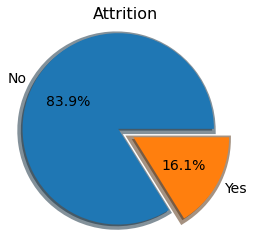

In [21]:
#define data
data = df['Attrition'].value_counts()
labels = ['No', 'Yes']
# 
#create pie chart
plt.pie(data, labels = labels, radius= 1.1, shadow=True, autopct='%.1f%%', 
        textprops = {'color': 'Black','fontsize':14}, wedgeprops = {'linewidth': 7}, explode = [0.10]*2)
plt.title("Attrition", fontsize=16)
plt.show()

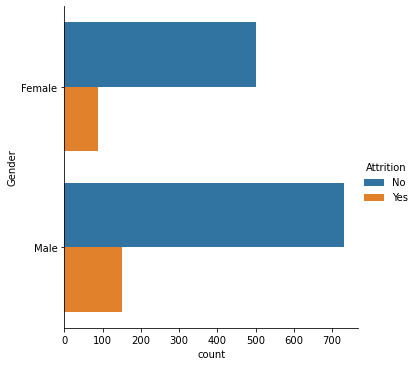

In [22]:
# Seaborn Count plot
sns.catplot(y='Gender', kind='count', hue ='Attrition', data=df);

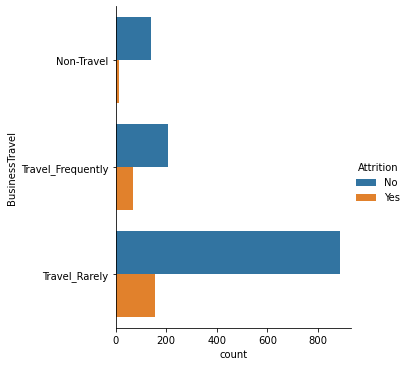

In [23]:
# Seaborn Count plot
sns.catplot(y='BusinessTravel', hue='Attrition', kind = 'count', data=df);

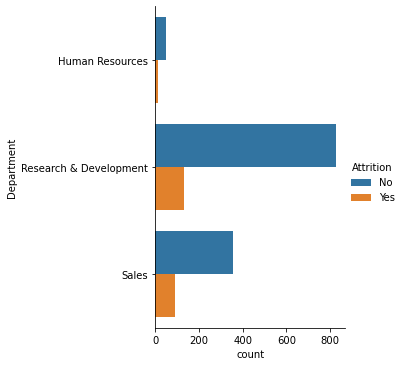

In [24]:
# Seaborn Count plot
sns.catplot(y='Department', hue='Attrition', kind = 'count', data=df);

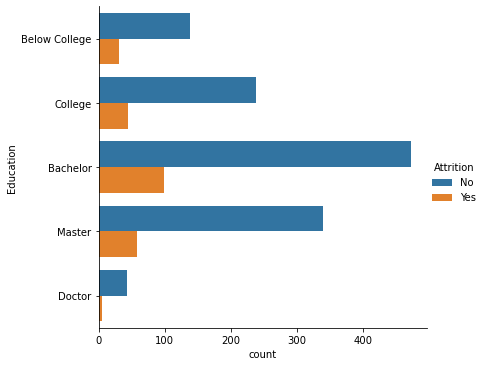

In [25]:
# Seaborn Count plot
sns.catplot(y='Education', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3,4],['Below College','College', 'Bachelor', 'Master', 'Doctor']);

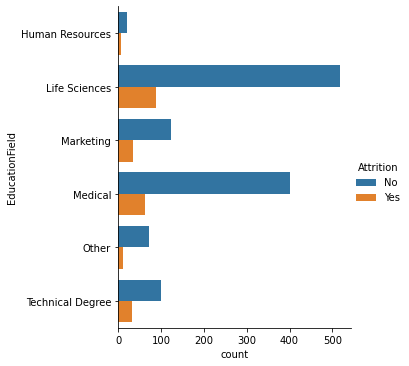

In [26]:
# Seaborn Count plot
sns.catplot(y='EducationField', hue='Attrition', kind = 'count', data=df);

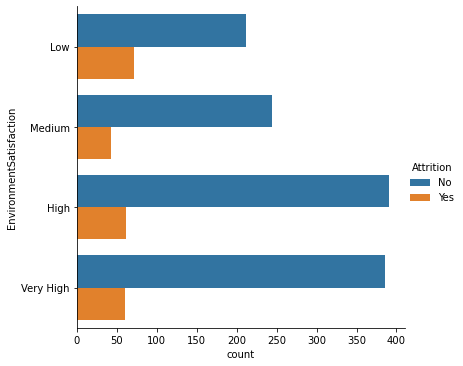

In [27]:
# Seaborn Count plot
sns.catplot(y='EnvironmentSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

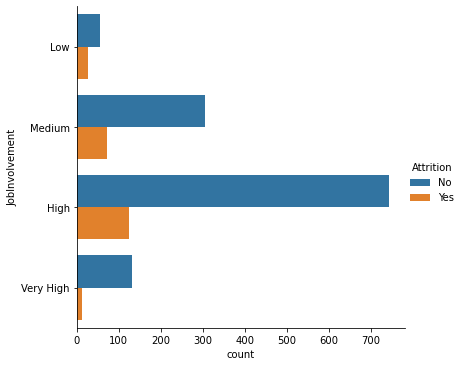

In [28]:
# Seaborn Count plot
sns.catplot(y='JobInvolvement', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

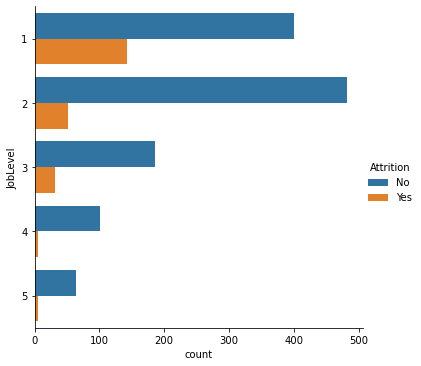

In [29]:
# Seaborn Count plot
sns.catplot(y='JobLevel', hue='Attrition', kind = 'count', data=df);

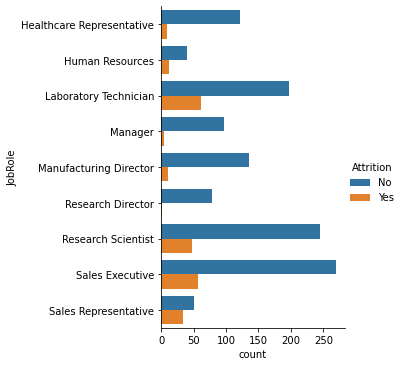

In [30]:
# Seaborn Count plot
ax = sns.catplot(y='JobRole', hue='Attrition', kind = 'count', data=df)

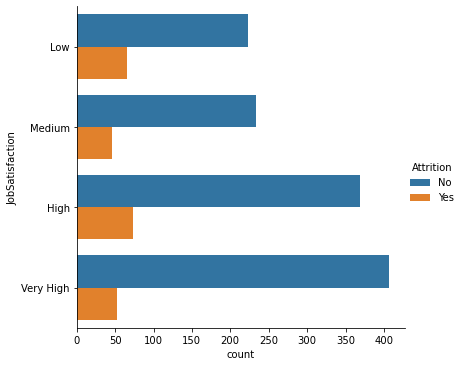

In [31]:
# Seaborn Count plot
sns.catplot(y='JobSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

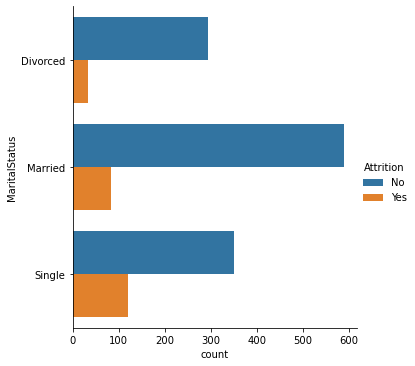

In [32]:
# Seaborn Count plot
sns.catplot(y='MaritalStatus', hue='Attrition', kind = 'count', data=df);

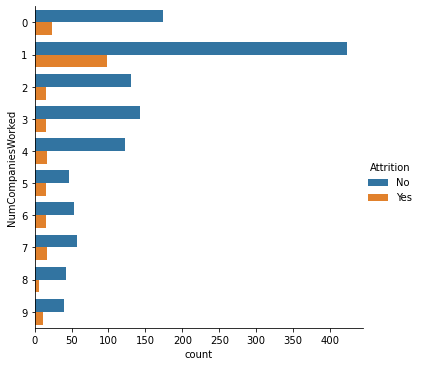

In [33]:
# Seaborn Count plot
sns.catplot(y='NumCompaniesWorked', hue='Attrition', kind = 'count', data=df);

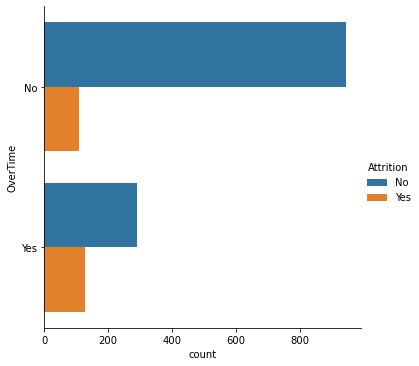

In [34]:
# Seaborn Count plot
sns.catplot(y='OverTime', hue='Attrition', kind = 'count', data=df);

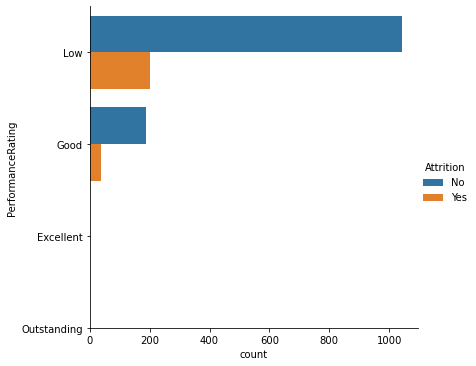

In [35]:
# Seaborn Count plot
sns.catplot(y='PerformanceRating', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Good', 'Excellent', 'Outstanding']);

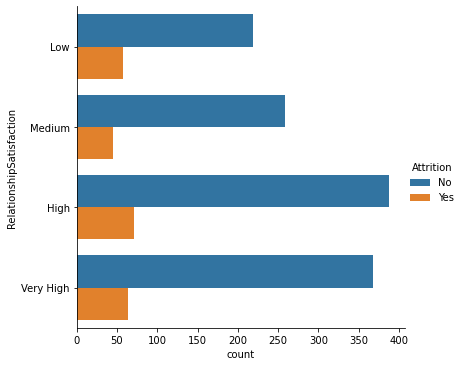

In [36]:
# Seaborn Count plot
sns.catplot(y='RelationshipSatisfaction', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Low','Medium', 'High', 'Very High']);

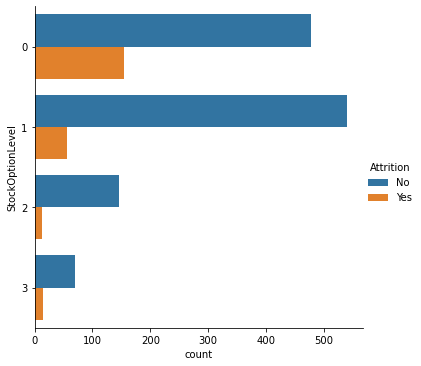

In [37]:
# Seaborn Count plot
sns.catplot(y='StockOptionLevel', hue='Attrition', kind = 'count', data=df);

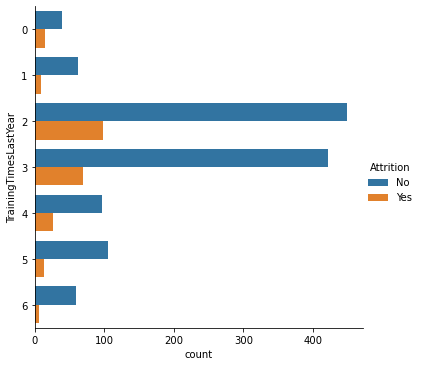

In [38]:
# Seaborn Count plot
sns.catplot(y='TrainingTimesLastYear', hue='Attrition', kind = 'count', data=df);

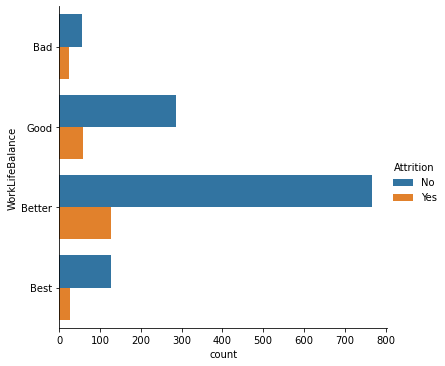

In [39]:
# Seaborn Count plot
sns.catplot(y='WorkLifeBalance', hue='Attrition', kind = 'count', data=df)
plt.yticks([0,1,2,3],['Bad','Good', 'Better', 'Best']);

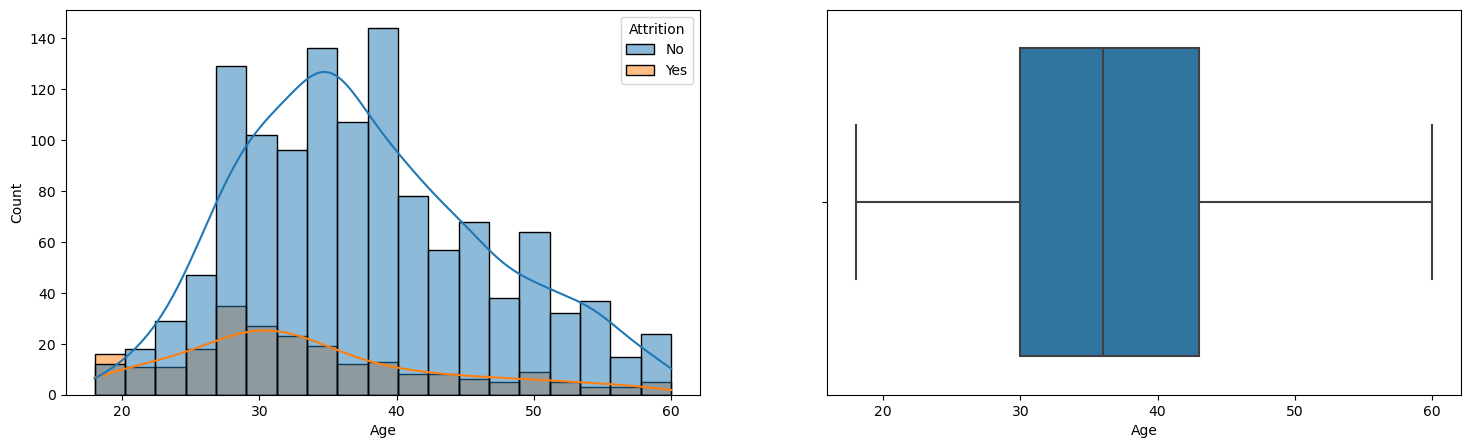

In [40]:
sns.reset_defaults()
# 
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='Age', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='Age',hue='Attrition', data=df);

In [41]:
# Data Issue: Require source correction or/and investigation
# will proceed with the data
df.Attrition[df.Age < 21].value_counts()

Yes    16
No     12
Name: Attrition, dtype: int64

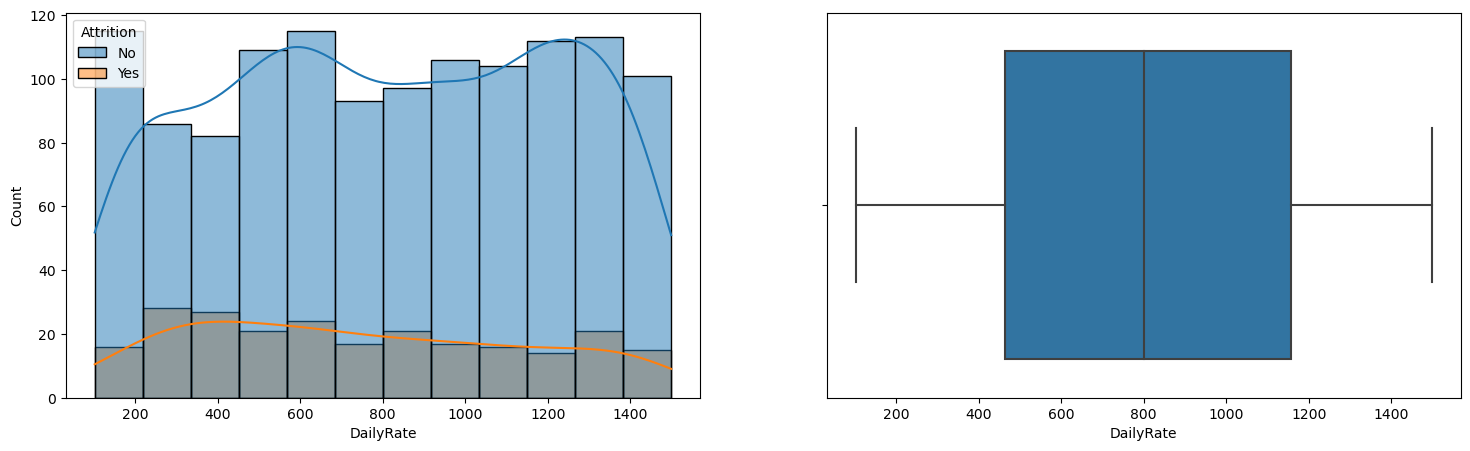

In [42]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='DailyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='DailyRate',hue='Attrition', data=df);

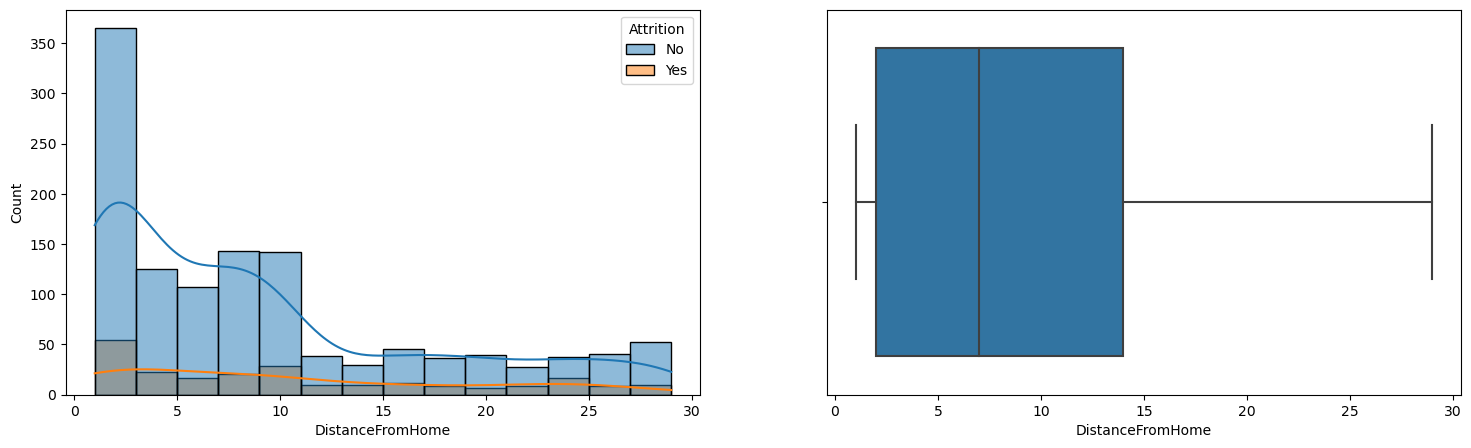

In [43]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='DistanceFromHome', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='DistanceFromHome',hue='Attrition', data=df);

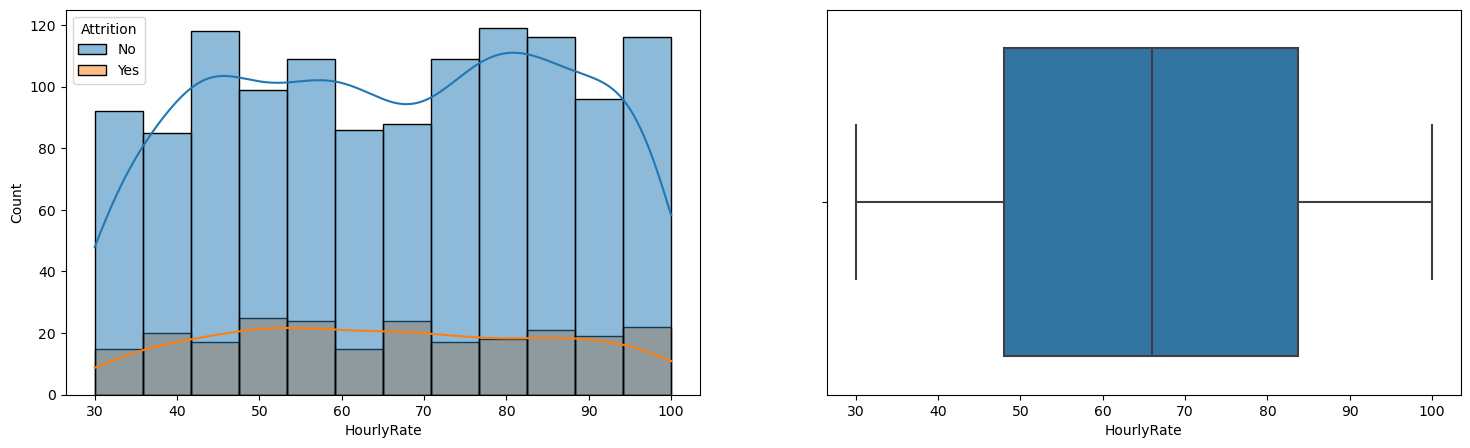

In [44]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='HourlyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='HourlyRate',hue='Attrition', data=df);

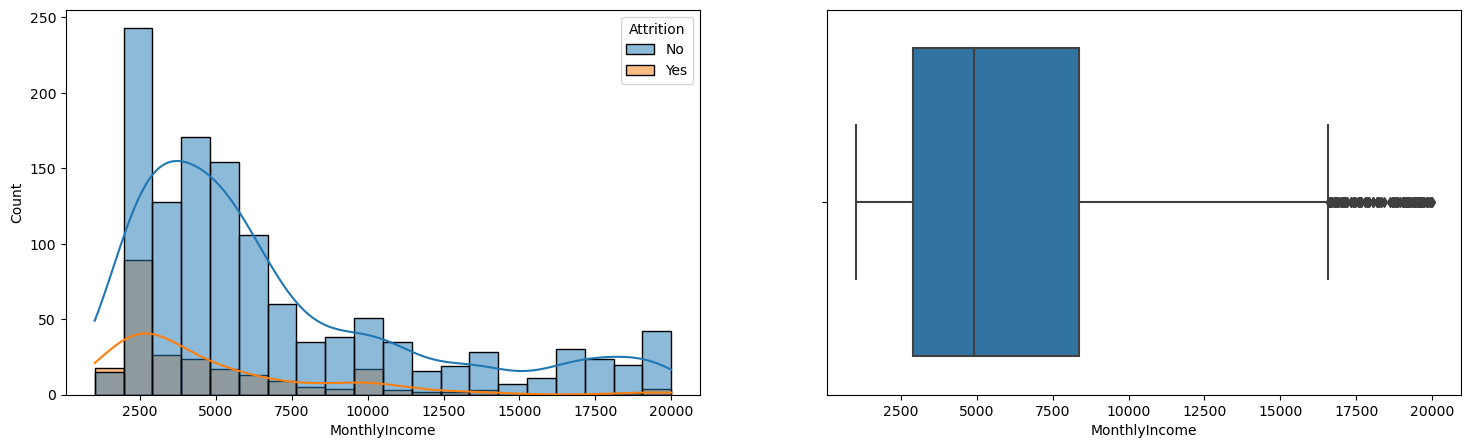

In [45]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='MonthlyIncome', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='MonthlyIncome',hue='Attrition', data=df);

In [46]:
# Display outliers
df.MonthlyIncome[df.MonthlyIncome > 17000].count()

97

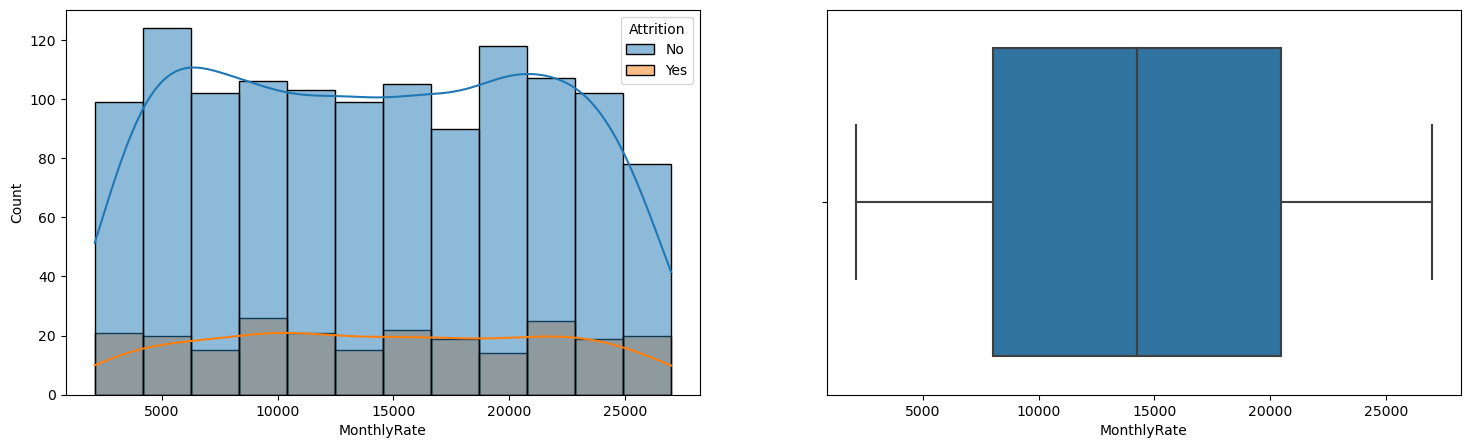

In [47]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='MonthlyRate', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='MonthlyRate',hue='Attrition', data=df);

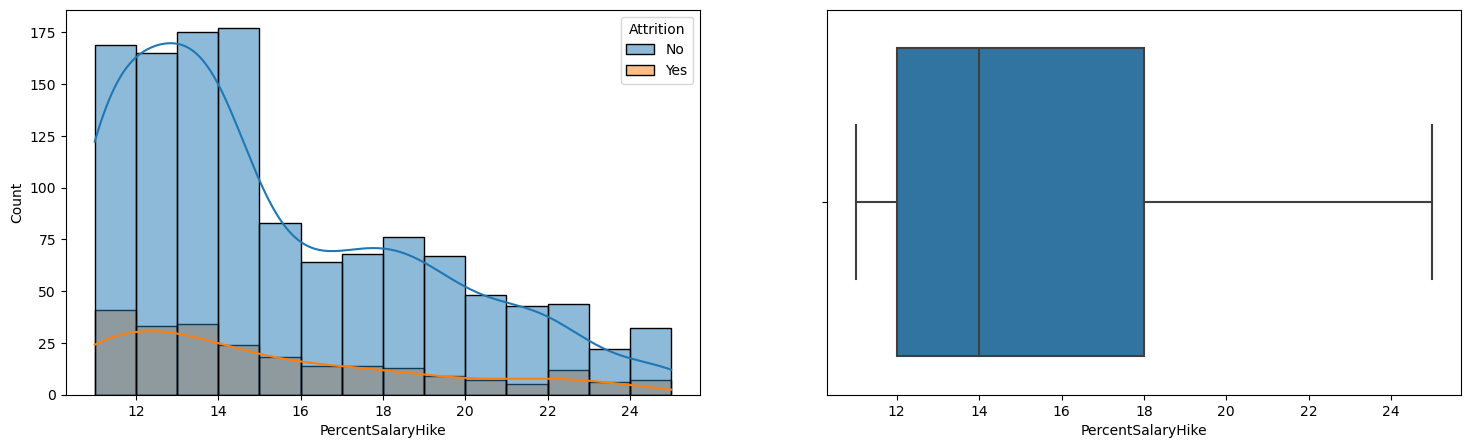

In [48]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='PercentSalaryHike', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='PercentSalaryHike',hue='Attrition', data=df);

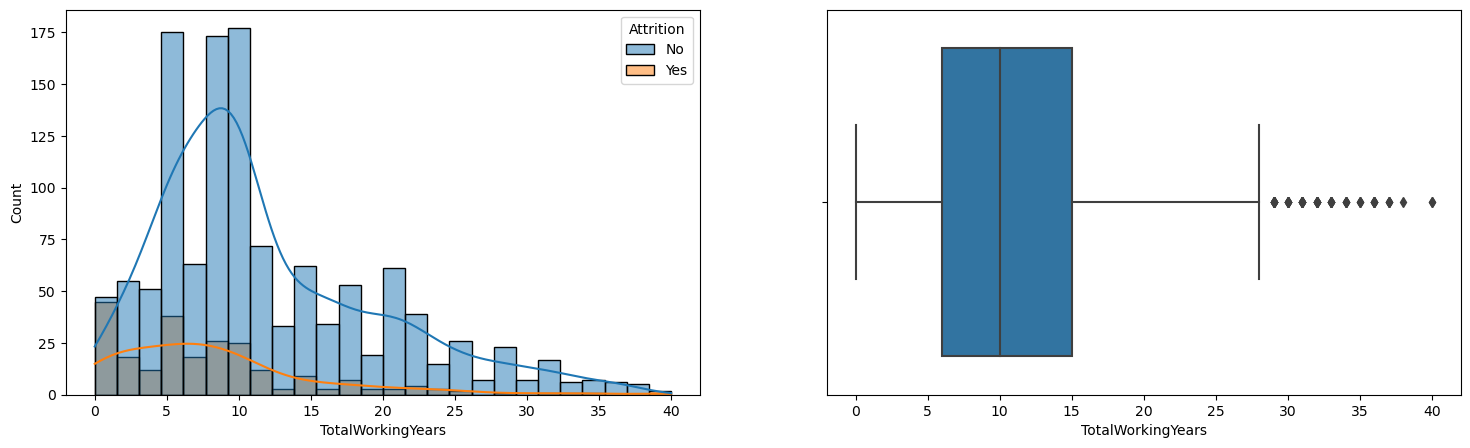

In [49]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='TotalWorkingYears', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='TotalWorkingYears',hue='Attrition', data=df);

In [50]:
# display outliers
df.TotalWorkingYears[df.TotalWorkingYears > 28].count()

63

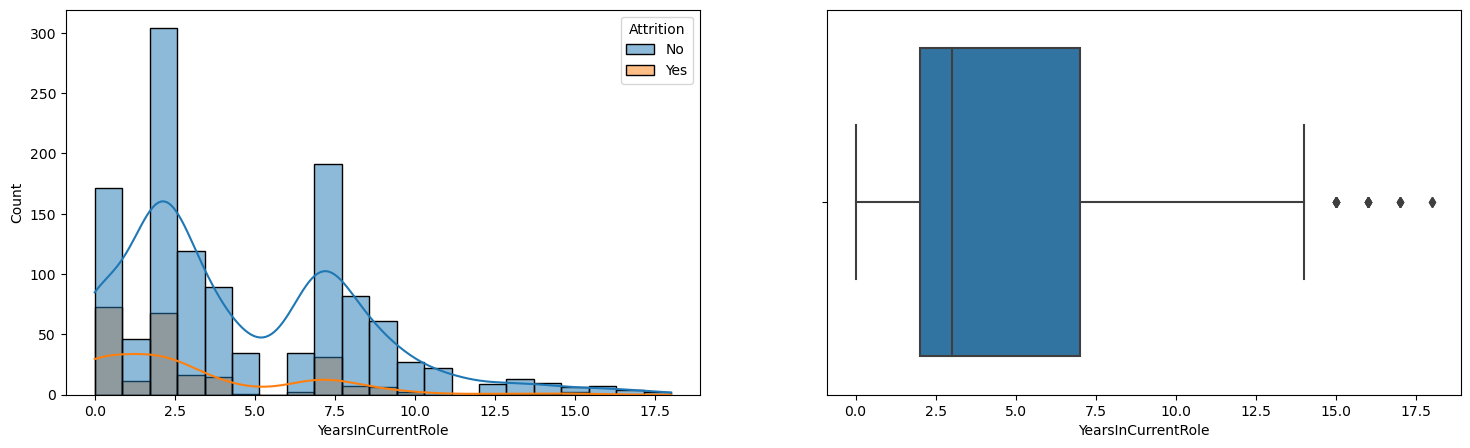

In [51]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsInCurrentRole', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsInCurrentRole',hue='Attrition', data=df);

In [52]:
# display outliers
df.YearsInCurrentRole[df.YearsInCurrentRole > 14].count()

21

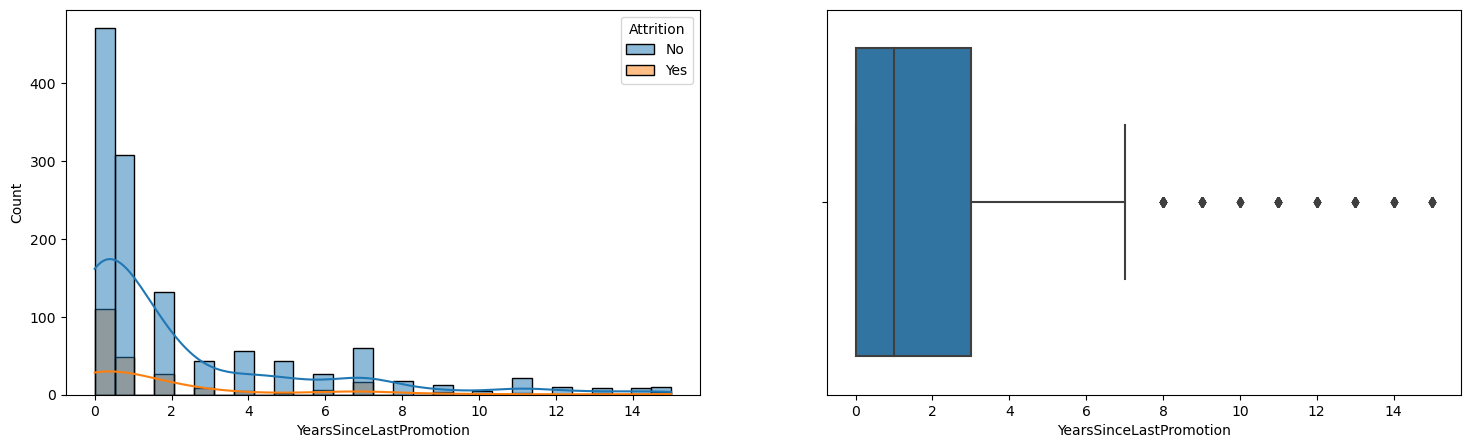

In [53]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsSinceLastPromotion', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsSinceLastPromotion',hue='Attrition', data=df);

In [54]:
# display outliers
df.YearsSinceLastPromotion[df.YearsSinceLastPromotion > 7].count()

107

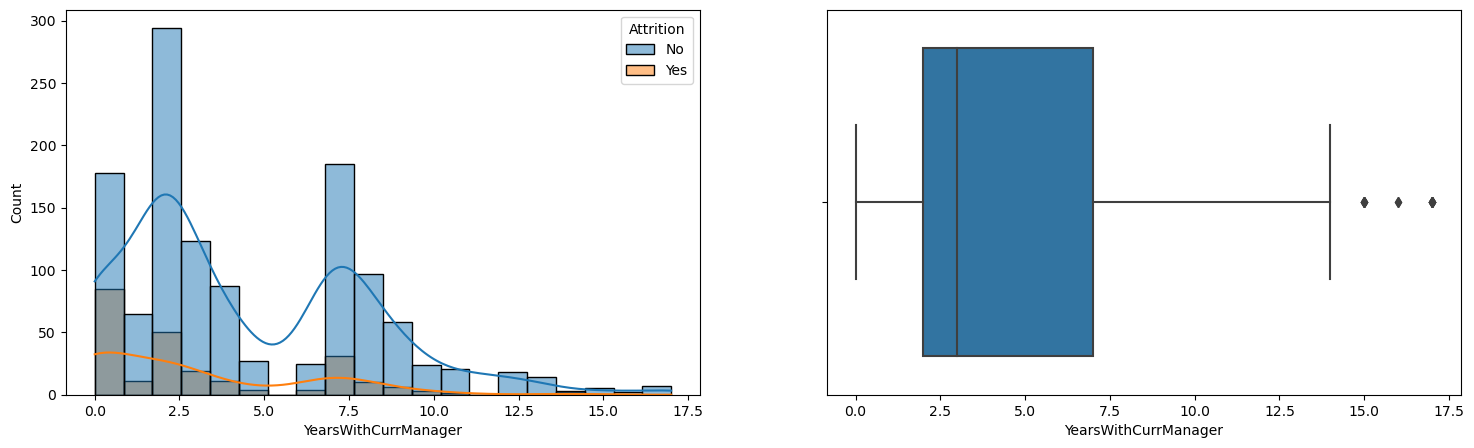

In [55]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
sns.histplot(ax=axes[0],x='YearsWithCurrManager', hue='Attrition', kde=True, data=df)
sns.boxplot(ax=axes[1], x='YearsWithCurrManager',hue='Attrition', data=df);

In [56]:
# display outliers
df.YearsWithCurrManager[df.YearsWithCurrManager > 14].count()

14

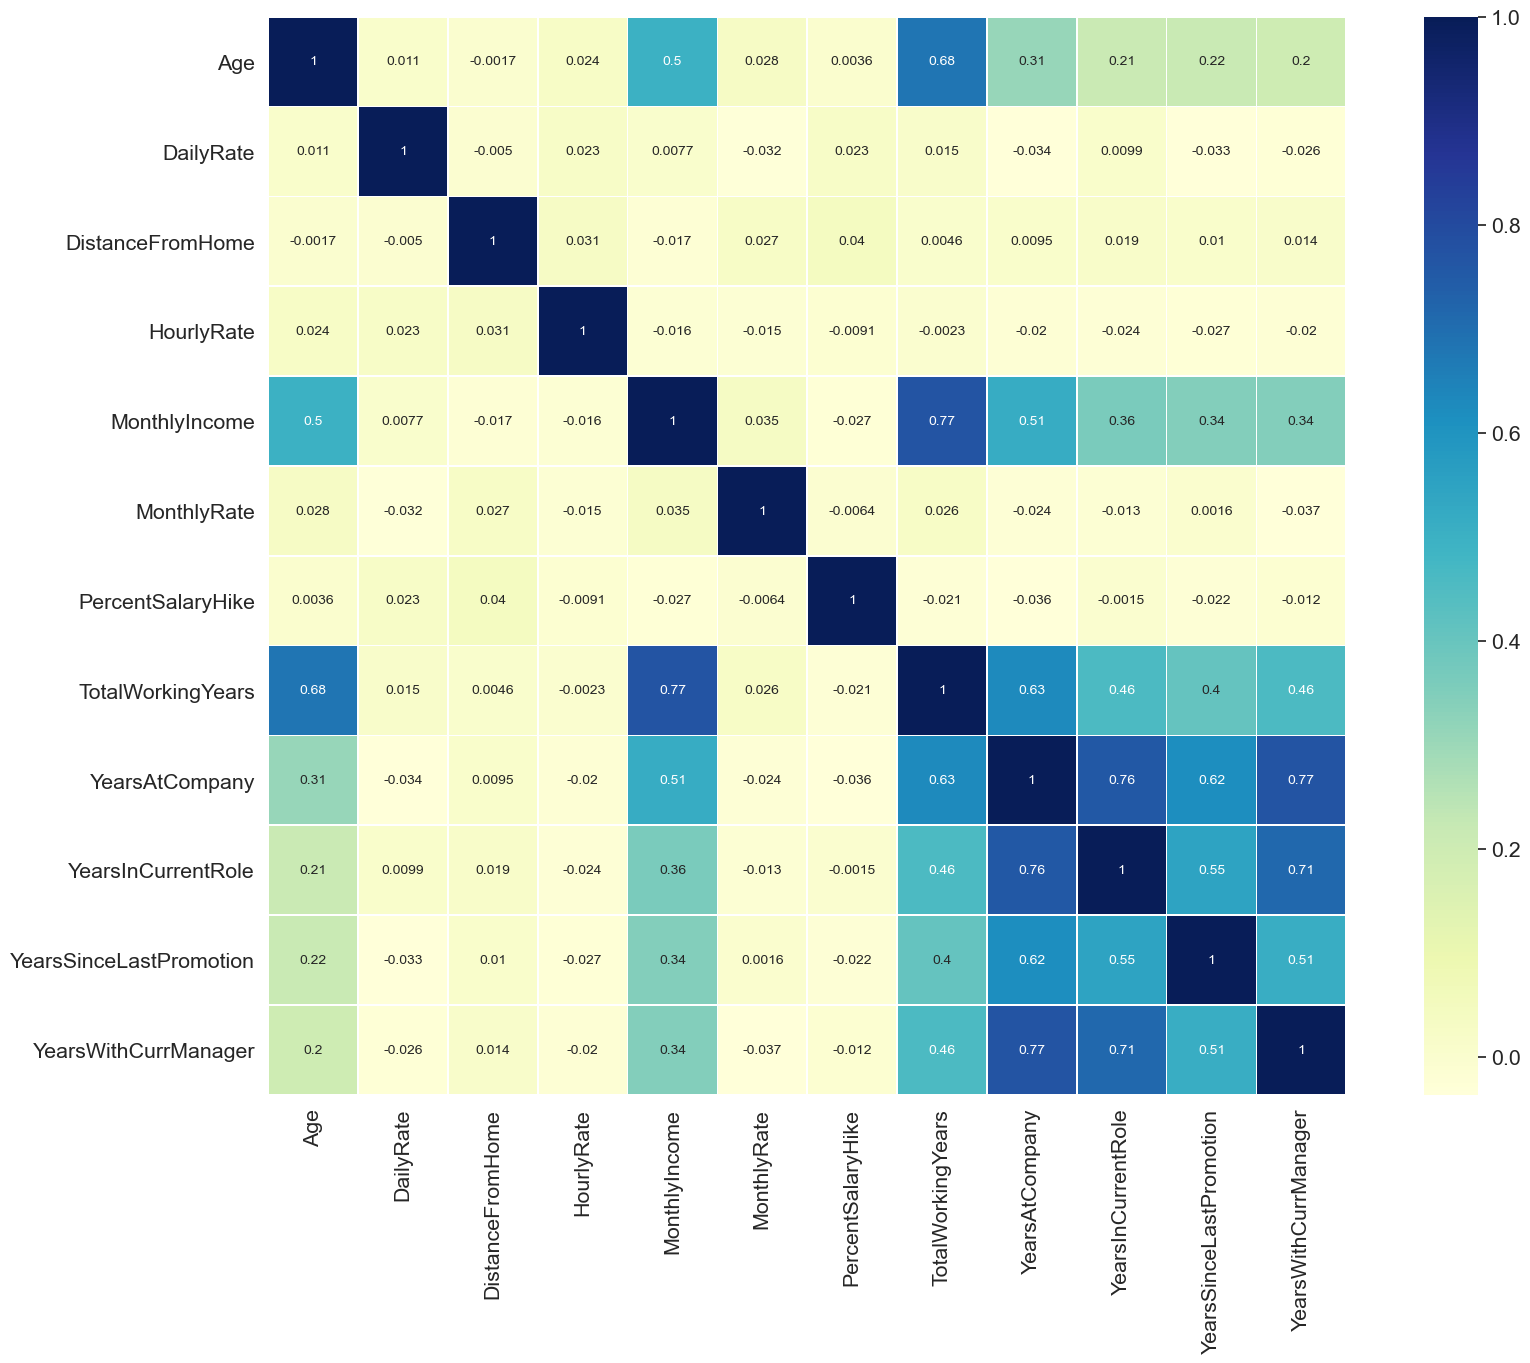

In [57]:
# Make a heatmap of the data
plt.figure(figsize=(20,14))
sns.set(font_scale = 1.4)
sns.heatmap(df.corr() ,annot=True, linewidths=.5, annot_kws={"size":10}, square=True, cmap='YlGnBu');

In [58]:
# Clean Dataset to Disk
%time df.to_csv('../Data/df_cleaned_HR.csv', index=False)

CPU times: user 11.4 ms, sys: 2.48 ms, total: 13.9 ms
Wall time: 12.4 ms
